In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
zara_df = pd.read_excel('./data/zara_llama3:instruct_topk8_paramsall.xlsx')
zara_df.drop(["Unnamed: 0"], axis=1, inplace=True)

hnm_df = pd.read_excel('./data/hm_llama3:instruct_topk8_paramsall.xlsx')
hnm_df.drop(["Unnamed: 0"], axis=1, inplace=True)


In [12]:
hnm_df.head()

,category,subcategory,question,decision,answer,source_pages,source_texts,faithfulness_score,faithfulness_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,semantic_semilarity_score,semantic_semilarity_feedback
0,target,1,How does the company track and report progress...,YES,"According to the report, H&M Group tracks and ...","9, 24, 41",[BEGIN OF SOURCES]\n\nPAGE 76: Read more belo...,0,NO,0.800,To evaluate if the retrieved context from the ...,4.0,The generated answer is highly relevant to the...,0.843944,Similarity score: 0.8439441114748478
1,target,2,What are the key factors or variables that are...,NO,"Based on the report, I did not find any key fa...",NaN,[BEGIN OF SOURCES]\n\nPAGE 25: fulfilment of ...,0,NO,0.000,Evaluation:\n\n1. Does the retrieved context m...,4.0,The generated answer is relevant to the user q...,0.716888,Similarity score: 0.71688796727893
2,target,3,Are the ESG factors integrated into the compan...,NO,Although the company mentions its commitment t...,"27, 34, 36",[BEGIN OF SOURCES]\n\nPAGE 27: The executive ...,1,YES,0.375,**Evaluation**\n\n1. Does the retrieved contex...,4.0,The generated answer is relevant to the user q...,0.754672,Similarity score: 0.7546719880097894
3,target,4,Does the company disclose relevant ESG factors...,YES,"Based on the report, H&M Group does disclose r...","34, 38, 40",[BEGIN OF SOURCES]\n\nPAGE 36: Launching new ...,1,YES,0.375,Evaluation:\n\n1. Does the retrieved context m...,4.0,The generated answer is highly relevant to the...,0.873698,Similarity score: 0.8736976693593452
4,target,5,Are environmental claims supported by credible...,NO,While the report provides some evidence to sup...,"24, 37, 29","[BEGIN OF SOURCES]\n\nPAGE 88: Accordingly, t...",1,YES,0.125,Evaluation of the retrieved context:\n\n1. Doe...,4.0,The generated answer is highly relevant to the...,0.813798,Similarity score: 0.8137983729466378


In [13]:
df = pd.concat([hnm_df['context_relevancy_score'], zara_df['context_relevancy_score']], axis=1)
df.columns = ['hnm_context_relevancy_score', 'zara_context_relevancy_score']
print(df)

    hnm_context_relevancy_score  zara_context_relevancy_score
0                         0.800                         0.875
1                         0.000                         0.750
2                         0.375                         0.700
3                         0.375                         0.250
4                         0.125                         0.375
5                         0.250                         0.250
6                         0.250                         0.250
7                         0.375                         0.250
8                         0.375                         0.875
9                         0.250                         0.875
10                        0.700                         0.000
11                        0.375                         0.250
12                        0.250                         0.250
13                        0.000                         0.250
14                        0.250                         0.375
15      

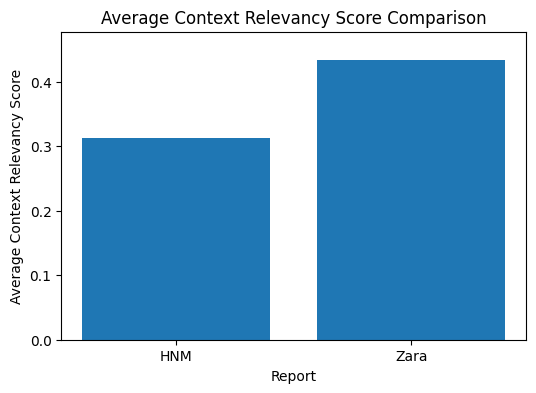

In [20]:
hnm_avg = df['hnm_context_relevancy_score'].mean()
zara_avg = df['zara_context_relevancy_score'].mean()

labels = ['HNM', 'Zara']
averages = [hnm_avg, zara_avg]

plt.figure(figsize=(6, 4))
plt.bar(labels, averages)
plt.xlabel('Report')
plt.ylabel('Average Context Relevancy Score')
plt.title('Average Context Relevancy Score Comparison')
plt.ylim(0, max(averages) * 1.1)  

plt.savefig('./context_relevancy_comp.png')
